<a href="https://colab.research.google.com/github/arethel/ClassificationProblemsWithPytorch/blob/main/pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_circles

In [4]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [5]:
len(X), len(y)

(1000, 1000)

In [6]:
print(f'First 5 samples of X:\n {X[:5]}')
print(f'First 5 samples of y:\n {y[:5]}')

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [7]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                       "X2": X[:, 1],
                       "y": y})
circles.head(10)

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


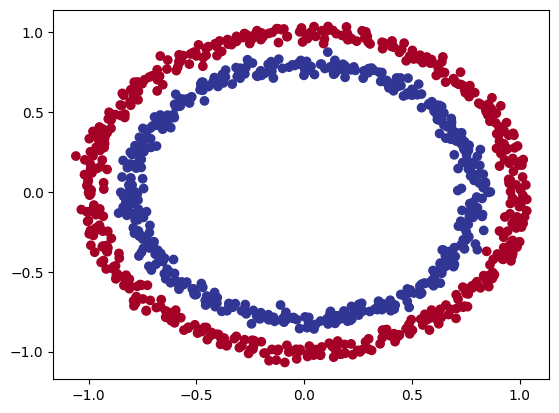

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [11]:
X_sample = X[0]
y_sample = y[0]

print(f'{X_sample} {y_sample}')
print(f'{X_sample.shape} {y_sample.shape}')

[0.75424625 0.23148074] 1
(2,) ()


In [12]:
import torch
torch.__version__

'2.0.1+cu118'

In [13]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [14]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [16]:
len(X_train), len(X_test)

(800, 200)

In [17]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [18]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2, 5)
        self.layer_2 = nn.Linear(5, 1)

    def forward(self, x):
        return self.layer_2(self.layer_1(x))

model_0 = CircleModel().to(device)
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [92]:
model_0 = nn.Sequential(
    nn.Linear(2,10),
    nn.ReLU(),
    nn.Linear(10,10),
    nn.ReLU(),
    nn.Linear(10,1)
).to(device)

In [20]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1659, -0.4013],
                      [ 0.0876,  0.2288],
                      [-0.5880, -0.0017],
                      [ 0.6970,  0.2036],
                      [-0.0805,  0.3085]])),
             ('0.bias', tensor([-0.3457, -0.4177,  0.2500, -0.6747,  0.5377])),
             ('1.weight',
              tensor([[ 0.0258, -0.2555, -0.2665, -0.1938,  0.1779]])),
             ('1.bias', tensor([0.0232]))])

In [22]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))

In [23]:
untrained_preds.shape

torch.Size([200, 1])

In [24]:
torch.round(untrained_preds[:10]), y_test[:10]

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [93]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.1)

In [27]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [29]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.2487],
        [0.2298],
        [0.3050],
        [0.2327],
        [0.3158]])

In [30]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5619],
        [0.5572],
        [0.5757],
        [0.5579],
        [0.5783]])

In [31]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [33]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

In [34]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [98]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):

    model_0.train()

    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f'{epoch} {loss:.5f} {acc:.2f}% {test_loss:.5f} {test_acc:.2f}%')


0 0.01048 100.00% 0.02451 99.50%
100 0.01011 100.00% 0.02389 99.50%
200 0.00976 100.00% 0.02332 99.50%
300 0.00943 100.00% 0.02278 99.50%
400 0.00913 100.00% 0.02228 99.50%
500 0.00885 100.00% 0.02181 99.50%
600 0.00858 100.00% 0.02138 99.50%
700 0.00833 100.00% 0.02094 99.50%
800 0.00809 100.00% 0.02053 99.50%
900 0.00787 100.00% 0.02015 99.50%


In [37]:
import requests
from pathlib import Path

if not Path("helper_functions.py").is_file():
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

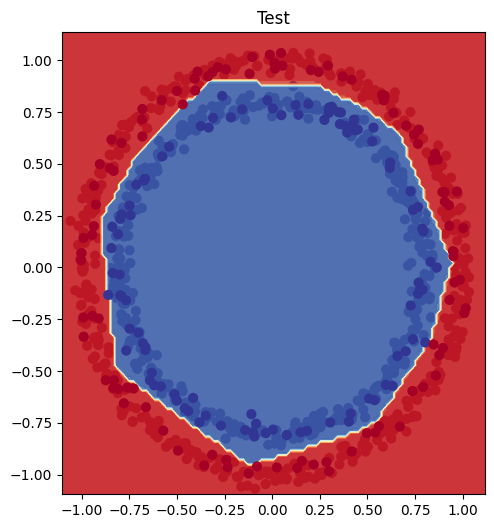

In [99]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 1)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

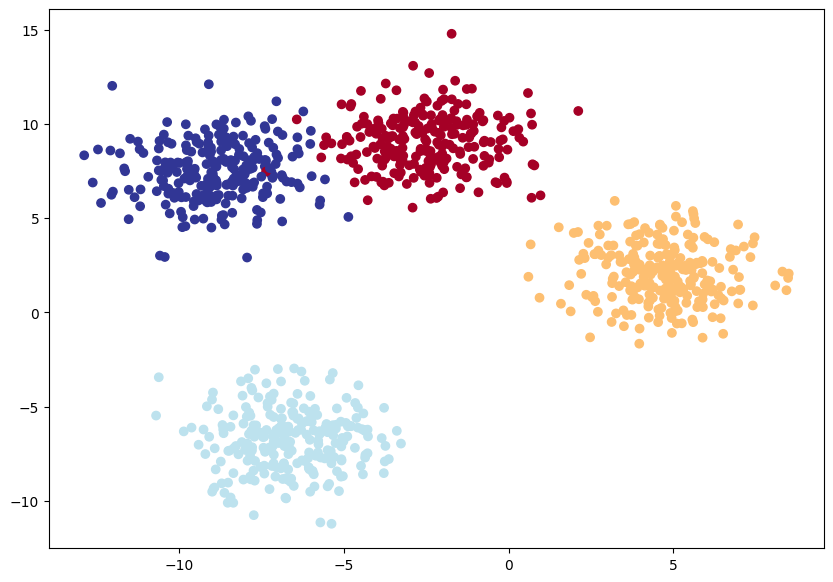

In [120]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state = RANDOM_SEED)

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

In [121]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [122]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(input_features, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)


model_blob = BlobModel(2, 4, 8)

In [123]:
model_blob

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [124]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [125]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [126]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_blob.parameters(),
                            lr = 0.1)

In [128]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):
    model_blob.train()

    y_logits = model_blob(X_blob_train)
    y_pred = torch.softmax(y_logits, 1).argmax(1)
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_blob_train,
                      y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_blob.eval()
    with torch.inference_mode():
        test_logits = model_blob(X_blob_test)
        test_pred = torch.softmax(test_logits, 1).argmax(1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_blob_test, test_pred)

    if epoch % 10 == 0:
        print(f'{epoch} {loss:.5f} {acc:.2f}% {test_loss:.5f} {test_acc:.2f}%')


0 1.15883 40.38% 1.07554 48.00%
10 0.64476 96.75% 0.66069 97.50%
20 0.42535 98.50% 0.43074 100.00%
30 0.25294 99.12% 0.24508 99.50%
40 0.11232 99.25% 0.10229 99.50%
50 0.06627 99.25% 0.05848 99.50%
60 0.05068 99.25% 0.04293 99.50%
70 0.04300 99.25% 0.03491 99.50%
80 0.03836 99.25% 0.02988 99.50%
90 0.03525 99.25% 0.02663 99.50%


tensor([0, 1, 2, 3])


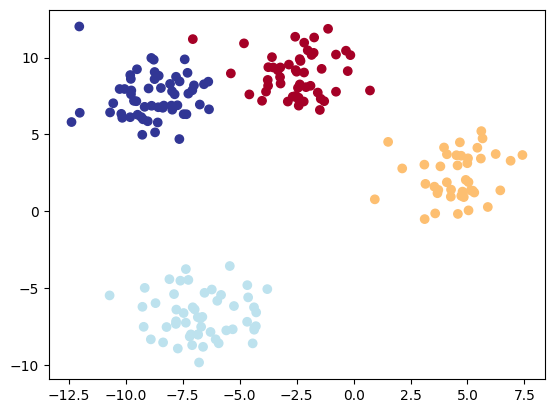

In [130]:
model_blob.eval()
with torch.inference_mode():
    preds = torch.round(torch.argmax(torch.softmax(model_blob(X_blob_test),1),1))
    print(torch.unique(preds))
    plt.scatter(X_blob_test[:,0], X_blob_test[:,1], c=preds, cmap=plt.cm.RdYlBu)

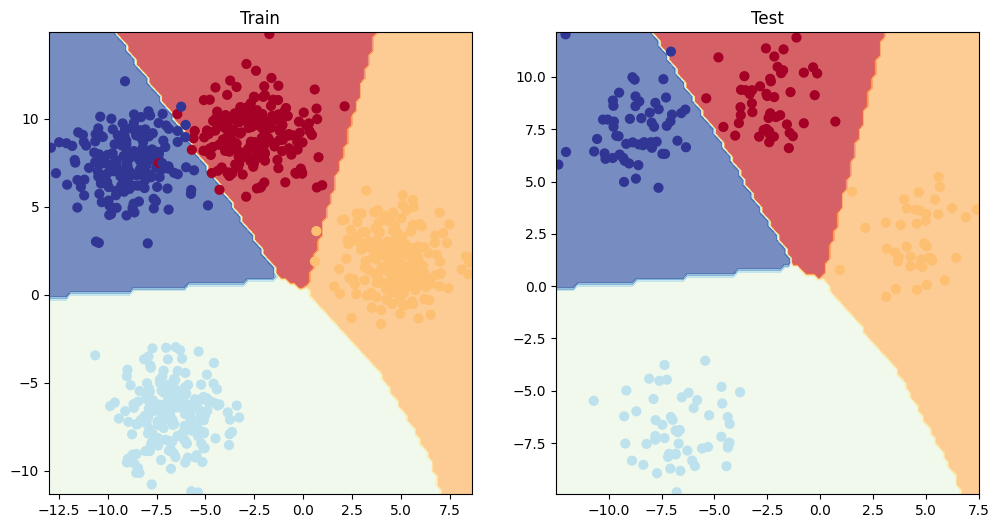

In [131]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_blob, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_blob, X_blob_test, y_blob_test)


In [132]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 8.2 MB/s eta 0:00:00


In [136]:
from torchmetrics import Accuracy

torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=4)

torchmetrics_accuracy(test_pred, y_blob_test)

tensor(0.9950)